Video Game Sales Compared to Common Quality Ratings
===

In [1]:
#Imports, tabulate may need to be downloaded
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, cos
import scipy.stats as ss
import matplotlib
from ipywidgets import widgets
import time
import tables
from tabulate import tabulate


Introduction
===

Over the past few decades, the video gaming industry has grown a tremendous amount. They've grown from a hobby that only single men can enjoy to a past time that the whole family and even (gasp) women can enjoy. According to Statistia.com, the value of the video game market is currently 15.1 Billion dollars and is expected to grow to 19.6 Billion by 2019. With an industry this large and sales that can be in the millions of units, it's easy to see why many game development companies are pretty excited about pushing out big titles that can make big bucks. With so much focus being put on profitablity of games these days, it begs the question: Does the quality of the game really matter? 

In this project, I'll be looking at the overall sales of games compared to their average critic rating, average user rating, and dollar per hour value. By doing this I hope to see if there is a correlation between the sales of a game and it's "quality" so to speak. I hope this will show if the success of a game is actually affected by the quality of the game, or if it is mostly due to the hype surrounding the game and marketing dollars spent by the company. Unfortunately, most gaming companies do not release how much they spend on marketing for a particular game, so I can only speculate the effect of marketing based on the other data I can obtain

I obtained my data from multiple sources. I got my total sales from the website vgcharts.com. Both the average critic ratings and the average user ratings were obtained from the site Metacritic. The game length for each game was obtained from the website howlongtobeat.com. The dollar per hour value was calculated using the starting price for each game, which was $59.99 for all of the games. I'd also like to note that all the games that are in this project are considered triple A titles. I choose to only use triple A titles because I wanted all of the data to be from similar categories to make the comparisons more valid and because there is more data available on triple A titles.


In [3]:
Games = ['Dark Souls 2', 'Watch Dogs', 'Madden NFL 15', 'FIFA 15', 'Middle Earth: Shadow of Mordor', 'Alien: Isolaton', 'NBA 2K15', 'Borderlands: The PreSequel',\
         'The Evil Within','Call of Duty: Advanced Warfare', 'Assassin\'s Creed: Unity', 'Dragon Age: Inquisition', 'Far Cry 4', 'Super Smash Bros. for Wii U and 3ds',\
         'Dying Light', 'Evolve', 'The Order: 1886', \
         'Mortal Kombat X',\
         'The Witcher 3: The Wild Hunt', 'Splatoon', 'Elder Scrolls Online: Tamriel Unlimited',\
        'Batman: Arkham Knight', 'Until Dawn', 'Metal Gear Solid V: The Phantom Pain', 'Mad Max', 'Super Mario Maker', 'Assassin\'s Creed Syndicate', \
        'Halo 5 Guardians', 'Call of Duty: Black Ops 3','Fallout 4', 'Rise of the Tomb Raider', 'Just Cause 3','Tom Clancy\'s Rainbow Six Seige']
ReleaseDate = ['March 11 2014', 'May 27 2014', 'August 24 2014', 'Sept 23 2014', 'Sept 30 2014', 'Oct 7 2014', 'Oct 7 2014', 'Oct 11 2014', 'Oct 14 2014', 'Nov 4 2014',\
               'Nov 14 2014', 'Nov 18 2014', 'Nov 18 2014', 'Nov 21 2014', 'Jan 27 2015',\
               'Feb 10 2015', 'Feb 20',\
               'April 7 2015','May 19 2015', 'May 29 2015',\
               'June 9 2015', 'June 23 2015', 'Aug 25 2015', 'Sept 1 2015',\
              'Sept 1 2015', 'Sept 11 2015', 'Oct 23 2015', 'Oct 27 2015', 'Nov 6 2015', 'Nov 10 2015', 'Nov 10 2015', 'Dec 1 2015', 'Dec 1 2015']
#Sales are in millions of units
TotalSales = [2.86, 9.27, 6.85, 14.39, 5.61, 2.29, 6.91, 1.61, 3.97, 21.56, 7.73, 4.57, 8.29, 12.06,\
              2.41, 1.63, 1.64, 3.75, 5.02, 4.25, 3.64, 4.97, 1.47, 4.64, 1.42, 2.9, 4.31, 3.72, 21.97, 11.04, 1.52, 2.57, 2.82]
#Ratings are out of 100
RatingC = [91, 80, 81, 82, 84, 81, 83, 75, 75, 83, 70, 89, 85, 92,\
           74, 76, 63, 83, 92, 81, 74, 87, 79, 93, 69, 88, 76, 84, 81, 87, 86, 73, 73]
RatingU = [79, 62, 61, 56, 81, 84, 70, 61, 73, 57, 48, 74, 77, 90,\
           79, 44, 67, 77, 88, 85, 77, 75, 82, 81, 78, 88, 67, 66, 46, 64, 81, 66, 69]
#Length is in hours
GameLength = [63.5, 32.5, 26.5, 60, 22.5, 23.5, 58, 26.5, 19, 9, 31, 86, 29, 42,\
              32, 6.5, 8.5, 12.5, 96.5, 8.5, 417.5, 27, 9, 79.5, 37.5, 18, 32.5, 11, 10, 70.5, 19, 31, 45]
#Initial opening price, excluding tax
#Dollar per hour value is the inital price divided by the game length(Assuming initial price is 59.99)
DpH = [.93, 1.85, 2.26, 1.00, 2.67, 2.55, 1.03, 2.26, 3.16, 6.67, 1.94, .70, 2.07, 1.43,\
       1.87, 9.23, 7.06, 4.80, .62, 7.06, .14, 2.22, 6.67, .75, 1.60, 3.33, 1.85, 5.45, 5.99, .85, 3.16, 1.94, 1.33 ]

Data in Chart Form
===

In [13]:
#This code creates a table that makes my data much easier to read. The function was imported from the package "tabulate"
table = [['Title', 'Total Sales (in millions)', 'Critic Rating', 'User Rating', 'Game Length', 'DpH'],
        [Games[0], TotalSales[0], RatingC[0], RatingU[0], GameLength[0], DpH[0]],\
         [Games[1], TotalSales[1], RatingC[1], RatingU[1], GameLength[1], DpH[1]],\
        [Games[2], TotalSales[2], RatingC[2], RatingU[2], GameLength[2], DpH[2]],
         [Games[3], TotalSales[3], RatingC[3], RatingU[3], GameLength[3], DpH[3]],
         [Games[4], TotalSales[4], RatingC[4], RatingU[4], GameLength[4], DpH[4]],
         [Games[5], TotalSales[5], RatingC[5], RatingU[5], GameLength[5], DpH[5]],
         [Games[6], TotalSales[6], RatingC[6], RatingU[6], GameLength[6], DpH[6]],
         [Games[7], TotalSales[7], RatingC[7], RatingU[7], GameLength[7], DpH[7]],
         [Games[8], TotalSales[8], RatingC[8], RatingU[8], GameLength[8], DpH[8]],
         [Games[9], TotalSales[9], RatingC[9], RatingU[9], GameLength[9], DpH[9]],
         [Games[10], TotalSales[10], RatingC[10], RatingU[10], GameLength[10], DpH[10]],
         [Games[11], TotalSales[11], RatingC[11], RatingU[11], GameLength[11], DpH[11]],
         [Games[12], TotalSales[12], RatingC[12], RatingU[12], GameLength[12], DpH[12]],
         [Games[13], TotalSales[13], RatingC[13], RatingU[13], GameLength[13], DpH[13]],
         [Games[14], TotalSales[14], RatingC[14], RatingU[14], GameLength[14], DpH[14]],
         [Games[15], TotalSales[15], RatingC[15], RatingU[15], GameLength[15], DpH[15]],
         [Games[16], TotalSales[16], RatingC[16], RatingU[16], GameLength[16], DpH[16]],
         [Games[17], TotalSales[17], RatingC[17], RatingU[17], GameLength[17], DpH[17]],
         [Games[18], TotalSales[18], RatingC[18], RatingU[18], GameLength[18], DpH[18]],
         [Games[19], TotalSales[19], RatingC[19], RatingU[19], GameLength[19], DpH[19]],
         [Games[20], TotalSales[20], RatingC[20], RatingU[20], GameLength[20], DpH[20]],
         [Games[21], TotalSales[21], RatingC[21], RatingU[21], GameLength[21], DpH[21]],
         [Games[22], TotalSales[22], RatingC[22], RatingU[22], GameLength[22], DpH[22]],
         [Games[23], TotalSales[23], RatingC[23], RatingU[23], GameLength[23], DpH[23]],
         [Games[24], TotalSales[24], RatingC[24], RatingU[24], GameLength[24], DpH[24]],
         [Games[25], TotalSales[25], RatingC[25], RatingU[25], GameLength[25], DpH[25]],
         [Games[26], TotalSales[26], RatingC[26], RatingU[26], GameLength[26], DpH[26]],
         [Games[27], TotalSales[27], RatingC[27], RatingU[27], GameLength[27], DpH[27]],
         [Games[28], TotalSales[28], RatingC[28], RatingU[28], GameLength[28], DpH[28]],
         [Games[29], TotalSales[29], RatingC[29], RatingU[29], GameLength[29], DpH[29]],
         [Games[30], TotalSales[30], RatingC[30], RatingU[30], GameLength[30], DpH[30]],
         [Games[31], TotalSales[31], RatingC[31], RatingU[31], GameLength[31], DpH[31]],
         [Games[32], TotalSales[32], RatingC[32], RatingU[32], GameLength[32], DpH[32]]]
         
print(tabulate(table))

---------------------------------------  -------------------------  -------------  -----------  -----------  ----
Title                                    Total Sales (in millions)  Critic Rating  User Rating  Game Length  DpH
Dark Souls 2                             2.86                       91             79           63.5         0.93
Watch Dogs                               9.27                       80             62           32.5         1.85
Madden NFL 15                            6.85                       81             61           26.5         2.26
FIFA 15                                  14.39                      82             56           60           1.0
Middle Earth: Shadow of Mordor           5.61                       84             81           22.5         2.67
Alien: Isolaton                          2.29                       81             84           23.5         2.55
NBA 2K15                                 6.91                       83             70     

Test for Normality
===

First I am going to test each data set for normality to decide whether to use parametric statistical methods or non-parametric statistical methods. I'll test for normality using the Shapiro-Wilks test.

$$W = \frac{(\sum^n_{i=1}a_ix_{(i)})^2}{\sum^n_{i=1}(x_i - \overline{x})^2}$$

This equation above is used to calculate the W value used in the Shapiro-Wilks Test. In this equation, the $x_{(i)}$ term is the 
$i^{th}$ sample, the $a_{(i)}$ is the $i^{th}$ constant, $n$ is the number of sample, and $\overline{x}$ is the mean. The closer this W value is to 1.00, the more indicative it is of a normal data set. The null hypothesis produced from this test is that the data is from a unknown parent normal distribution. If the p value is greater than .05, we can say that our data is normal.

In [8]:
#Test for normality
ss.shapiro(TotalSales)

(0.7603741884231567, 6.169616881379625e-06)

The W value for the total sales data is .7604 and the p-value is $6.17 * 10^{-6}$. Because the p-value is less than .05, we can reject the null hypothesis and say that this data is not normal.

In [9]:
#Test for normailty
ss.shapiro(RatingC)

(0.9750089645385742, 0.6294102072715759)

The W value for the total sales data is .975 and the p-value is .6294. Because the p-value is greater than .05, we can accept the null hypothesis and say that this data is normal.



In [10]:
#Test for normality
ss.shapiro(RatingU)

(0.9516222476959229, 0.14834752678871155)

The W value for the total sales data is .9516 and the p-value is .1483. Because the p-value is greater than .05, we can accept the null hypothesis and say that this data is normal.

In [12]:
#Test for normality
ss.shapiro(DpH)

(0.8508163094520569, 0.00035481704981066287)

The W value for the total sales data is .8508 and the p-value is .0035. Because the p-value is less than .05, we can reject the null hypothesis and say that this data is not normal.

Based on these normality tests, we should use non-parametric statistic methods to compare these data sets because some on the data is not normal. Because the the data will be matched, this means I will use the Spearman's Correlation Test.

Plots of Data and Hypothesis Testing
===

To test if my data sets are correlated, I am using Spearman's Correlation Test because I need to find whether or not the data is correlated and my data sets are matched. Using Spearman's Correlation Test also works well because my data is not normal

$$\rho = 1 - \frac{6\sum{d^2_i}}{n(n^2-1)}$$

This is the equation used for the Spearman's Correlation Test. In this equation, $d_{i}$ is the difference between ranks of observtion, and n is the number of obeservations. A higher $\rho$ value would indicate that there is a strong positive relationship between the two data sets.

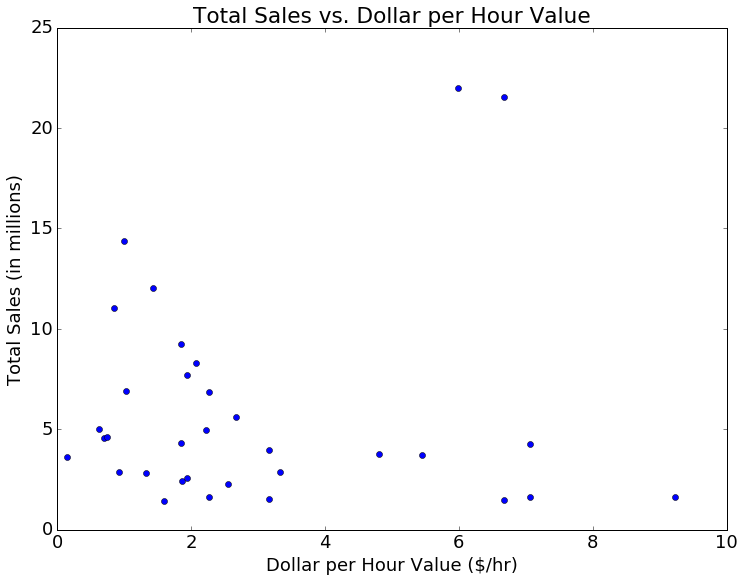

In [127]:
plt.plot(DpH, TotalSales, 'o')
plt.title('Total Sales vs. Dollar per Hour Value')
plt.xlabel('Dollar per Hour Value ($/hr)')
plt.ylabel('Total Sales (in millions)')
matplotlib.rcParams['figure.figsize'] = (12, 9)
matplotlib.rcParams.update({'font.size': 18})
plt.show()


In [53]:
#Spearman's Correlation Test
c,p_value = ss.spearmanr(TotalSales, DpH)
print('For these two data sets, the p-value is {:.4} and the correlation coefficient is {:.4}'.format(p_value,c))


For these two data sets, the p-value is 0.1787 and the correlation coefficient is -0.2399


For this hypothesis test, the null hypothesis would be that there is no correlation between the Total Sales and the Dollar per Hour Value of a game. Based on our p-value of 0.1787, we would accept this null hypothesis because our p-value is higher than the accepted value of .05. This means that there is no significant correlation between the two data sets

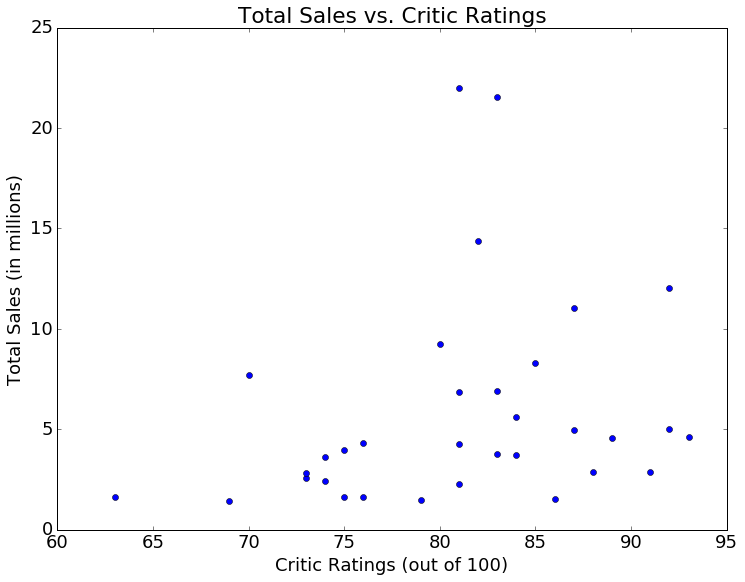

In [129]:
plt.plot(RatingC, TotalSales, 'o')
plt.title('Total Sales vs. Critic Ratings')
plt.xlabel('Critic Ratings (out of 100)')
plt.ylabel('Total Sales (in millions)')
matplotlib.rcParams['figure.figsize'] = (12, 9)
matplotlib.rcParams.update({'font.size': 18})
plt.show()


In [52]:
#Spearman's Correlation Test
c2,p_value2 = ss.spearmanr(TotalSales, RatingC)
print('For these two data sets, the p-value is {:.4} and the correlation coefficient is {:.4}'.format(p_value2,c2))

For these two data sets, the p-value is 0.01833 and the correlation coefficient is 0.4083


For this hypothesis test, the null hypothesis would be that there is no correlation between Total Sales and Critic Rating of a game. Based on our p-value of .01833, we would reject this null hypothesis because out p-value is less than the accepted value of .05. This means that there is significant correlation between this two data sets. Our correlation coefficient of 0.4083 shows that there is a slightly positive correlation between the Total Sales and Critic Rating of a game.

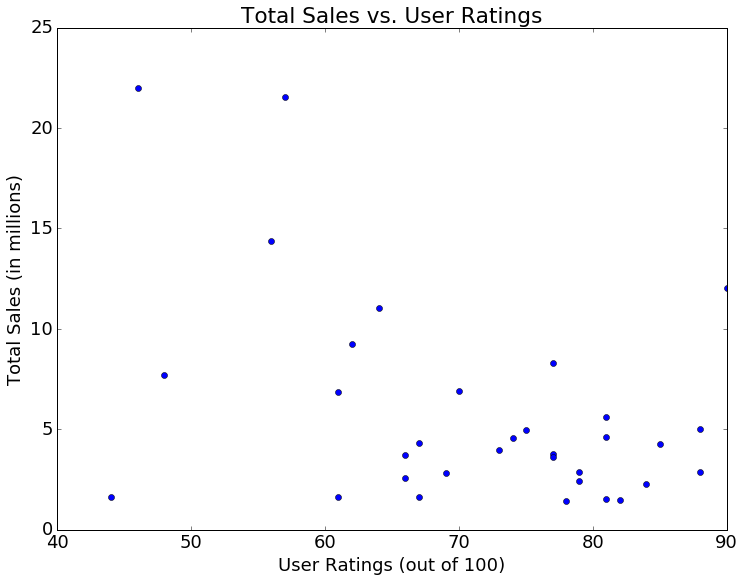

In [130]:
plt.plot(RatingU, TotalSales, 'o')
plt.title('Total Sales vs. User Ratings')
plt.xlabel('User Ratings (out of 100)')
plt.ylabel('Total Sales (in millions)')
matplotlib.rcParams['figure.figsize'] = (12, 9)
matplotlib.rcParams.update({'font.size': 18})
plt.show()

In [51]:
#Spearman's Correlation Test
c3,p_value3 = ss.spearmanr(TotalSales, RatingU)
print('For these two data sets, the p-value is {:.4} and the correlation coefficient is {:.4}'.format(p_value3,c3))

For these two data sets, the p-value is 0.1181 and the correlation coefficient is -0.2774


For this hypothesis test, the null hypothesis would be that there is no correlation between Total Sales and User Ratings for a game. Based on our p-value of 0.1181, we would accept this null hypothesis because our p-value is greater than the accepted value of .05. This means that there is no significant correlation between these two data sets.

These correlation tests show us that Total Sales is not correlated with Dollar per Hour Value or User Ratings. But it is slightly correlated with Critic Ratings. This might mean that consumers do actually take critic ratings into account when they are deciding to purchase a new game. I find it surprising that User Ratings do not seem to have any effect on the Total Sales, but the critic rating does.

Bar Graph Representation of Data
===

Here's some bar graphs to represent the data in a different way. The games are displayed in the order that they came out, so the first bar in the first graph is the first game in my data that came out.

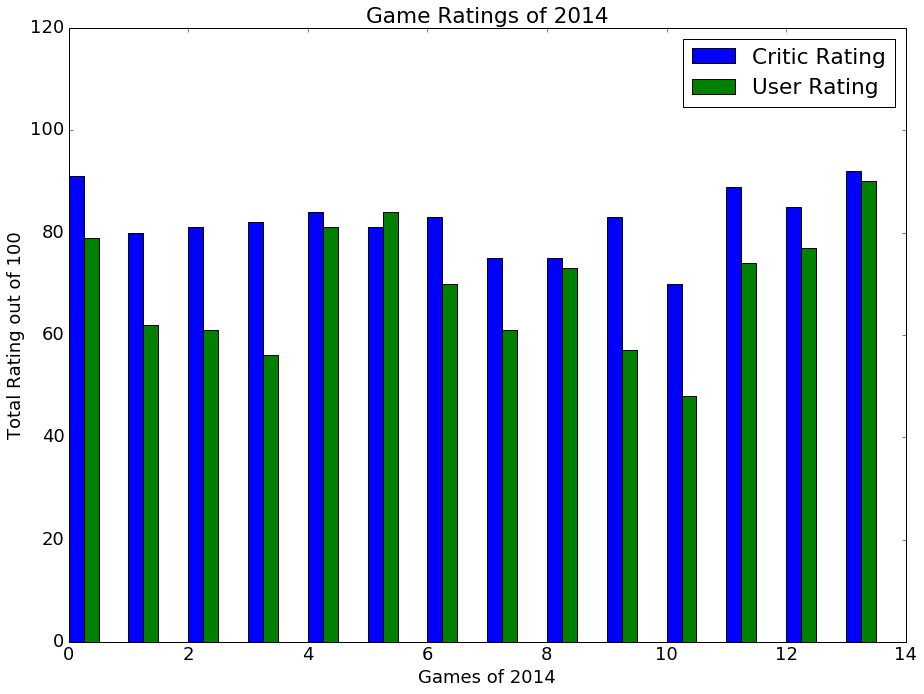

In [15]:
import numpy as np
import matplotlib.pyplot as plt

data = [
  [91, 80, 81, 82, 84, 81, 83, 75, 75, 83, 70, 89, 85, 92],
  [79, 62, 61, 56, 81, 84, 70, 61, 73, 57, 48, 74, 77, 90]]

X = np.arange(14)
plt.bar(X + 0.00, data[0], color = 'b', width = 0.25, label ='Critic Rating')
plt.bar(X + 0.25, data[1], color = 'g', width = 0.25, label = 'User Rating')

matplotlib.rcParams['figure.figsize'] = (15, 11)
plt.title('Game Ratings of 2014')
matplotlib.rcParams.update({'font.size': 18})
plt.xlabel('Games of 2014')
plt.ylabel('Total Rating out of 100')
plt.legend()
plt.ylim(0,120)


plt.show()

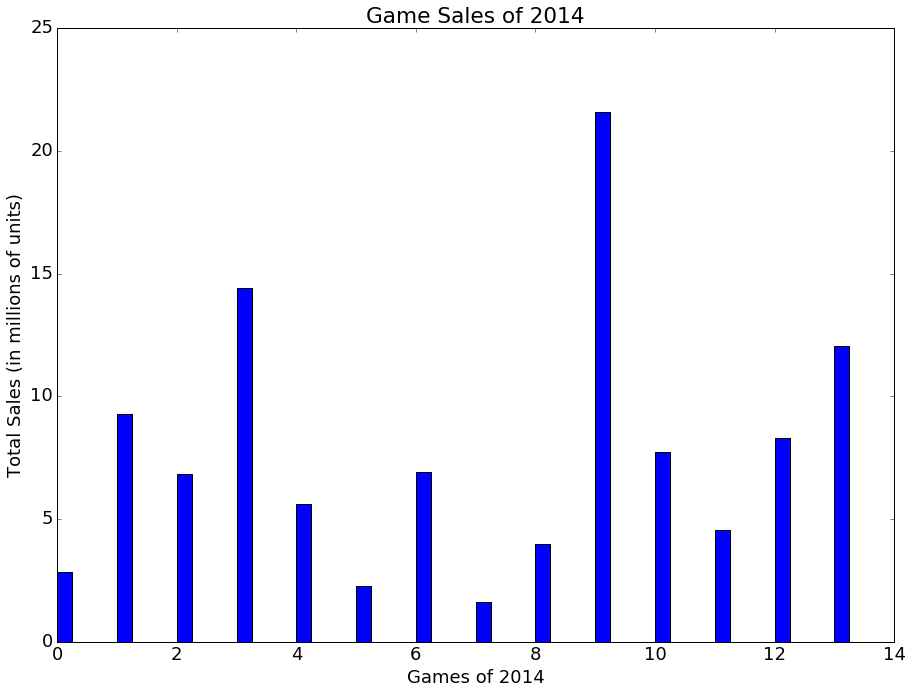

In [123]:
data = [
  [2.86, 9.27, 6.85, 14.39, 5.61, 2.29, 6.91, 1.61, 3.97, 21.56, 7.73, 4.57, 8.29, 12.06],
  ]

X = np.arange(14)
plt.bar(X + 0.00, data[0], color = 'b', width = 0.25)


matplotlib.rcParams['figure.figsize'] = (15, 11)
plt.title('Game Sales of 2014')
matplotlib.rcParams.update({'font.size': 18})
plt.xlabel('Games of 2014')
plt.ylabel('Total Sales (in millions of units)')


plt.show()

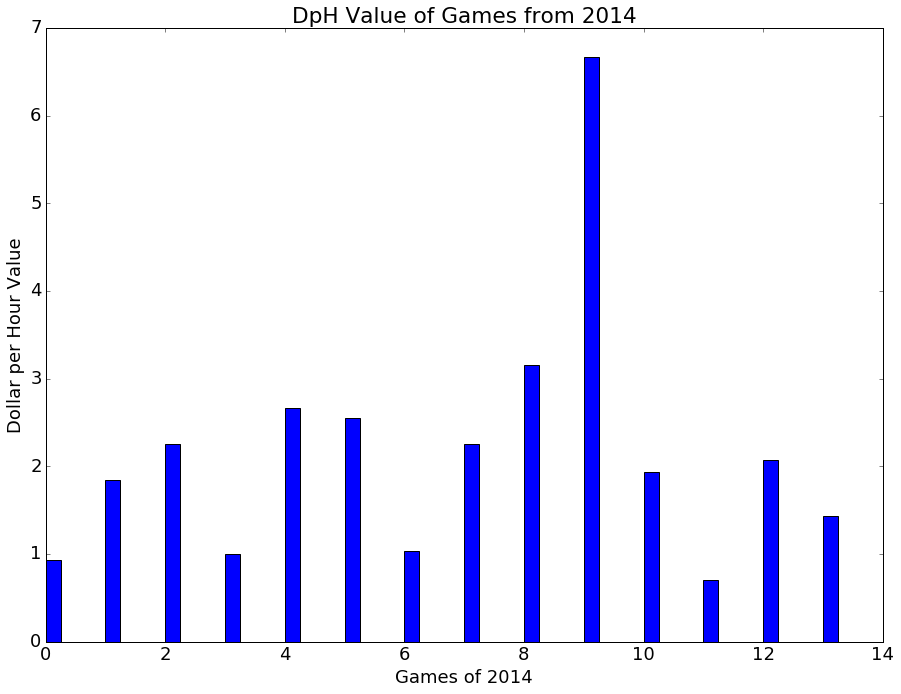

In [129]:
data = [
  [.93, 1.85, 2.26, 1.00, 2.67, 2.55, 1.03, 2.26, 3.16, 6.67, 1.94, .70, 2.07, 1.43],
  ]

X = np.arange(14)
plt.bar(X + 0.00, data[0], color = 'b', width = 0.25)


matplotlib.rcParams['figure.figsize'] = (15, 11)
plt.title('DpH Value of Games from 2014')
matplotlib.rcParams.update({'font.size': 18})
plt.xlabel('Games of 2014')
plt.ylabel('Dollar per Hour Value')


plt.show()

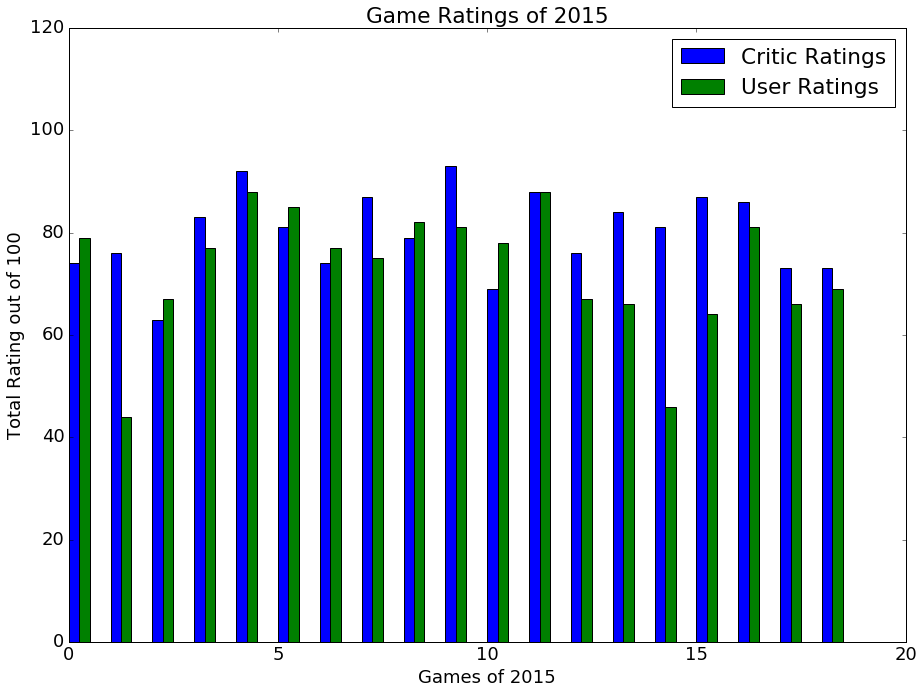

In [17]:
data = [
  [ 74, 76, 63, 83, 92, 81, 74, 87, 79, 93, 69, 88, 76, 84, 81, 87, 86, 73, 73],
  [79, 44, 67, 77, 88, 85, 77, 75, 82, 81, 78, 88, 67, 66, 46, 64, 81, 66, 69]]

X = np.arange(19)
plt.bar(X + 0.00, data[0], color = 'b', width = 0.25, label ='Critic Ratings')
plt.bar(X + 0.25, data[1], color = 'g', width = 0.25, label ='User Ratings')

matplotlib.rcParams['figure.figsize'] = (15, 11)
plt.title('Game Ratings of 2015')
matplotlib.rcParams.update({'font.size': 18})
plt.xlabel('Games of 2015')
plt.ylabel('Total Rating out of 100')
plt.ylim(0,120)
plt.legend()



plt.show()

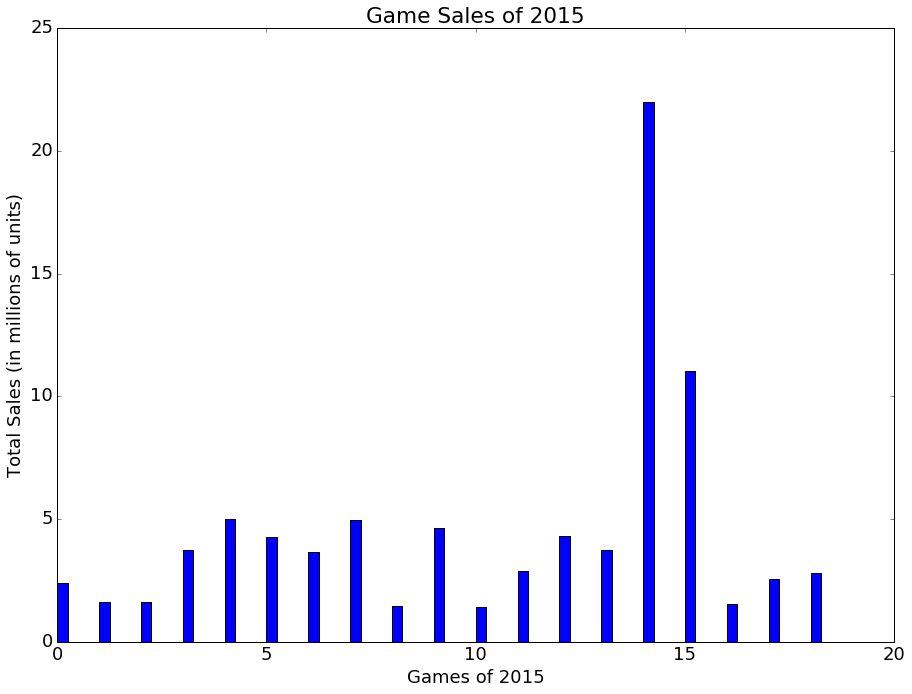

In [127]:
data = [
  [2.41, 1.63, 1.64, 3.75, 5.02, 4.25, 3.64, 4.97, 1.47, 4.64, 1.42, 2.9, 4.31, 3.72, 21.97, 11.04, 1.52, 2.57, 2.82],
  ]

X = np.arange(19)
plt.bar(X + 0.00, data[0], color = 'b', width = 0.25)


matplotlib.rcParams['figure.figsize'] = (15, 11)
plt.title('Game Sales of 2015')
matplotlib.rcParams.update({'font.size': 18})
plt.xlabel('Games of 2015')
plt.ylabel('Total Sales (in millions of units)')


plt.show()

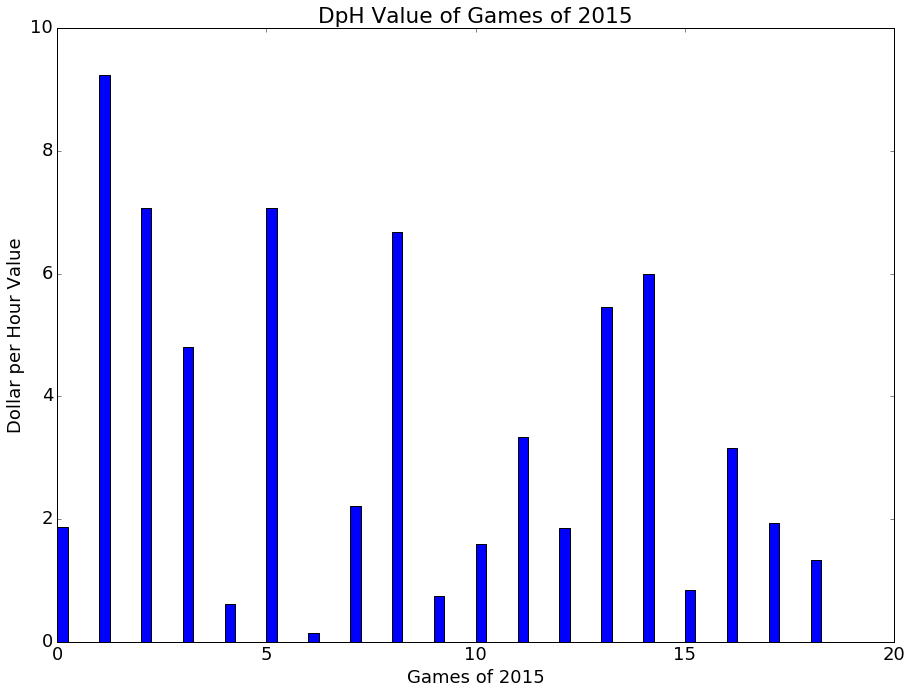

In [128]:
data = [
  [1.87, 9.23, 7.06, 4.80, .62, 7.06, .14, 2.22, 6.67, .75, 1.60, 3.33, 1.85, 5.45, 5.99, .85, 3.16, 1.94, 1.33],
  ]

X = np.arange(19)
plt.bar(X + 0.00, data[0], color = 'b', width = 0.25)


matplotlib.rcParams['figure.figsize'] = (15, 11)
plt.title('DpH Value of Games of 2015')
matplotlib.rcParams.update({'font.size': 18})
plt.xlabel('Games of 2015')
plt.ylabel('Dollar per Hour Value')


plt.show()

Histrogrammed Data
===

As another way to visualize the data and observe the correlation between data sets, I have histogrammed the data below

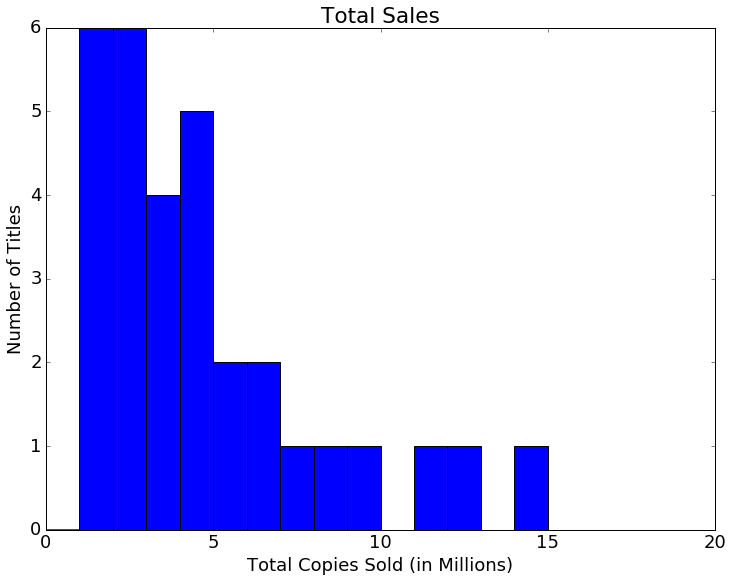

In [48]:
plt.hist(TotalSales, bins=np.arange(0,20))
matplotlib.rcParams['figure.figsize'] = (12, 9)
matplotlib.rcParams.update({'font.size': 18})
plt.title('Total Sales')
plt.ylabel('Number of Titles')
plt.xlabel('Total Copies Sold (in Millions)')





plt.show()

Based on this histogram, most of the games in this data set sold around 1.5-5 million copies.

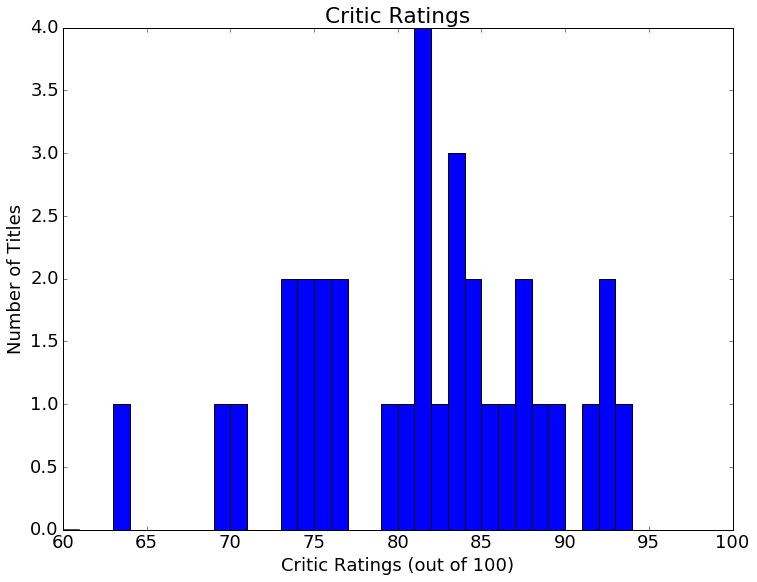

In [46]:
plt.hist(RatingC, bins=np.arange(60,100))
matplotlib.rcParams['figure.figsize'] = (12, 9)
matplotlib.rcParams.update({'font.size': 18})
plt.title('Critic Ratings')
plt.ylabel('Number of Titles')
plt.xlabel('Critic Ratings (out of 100)')


plt.show()

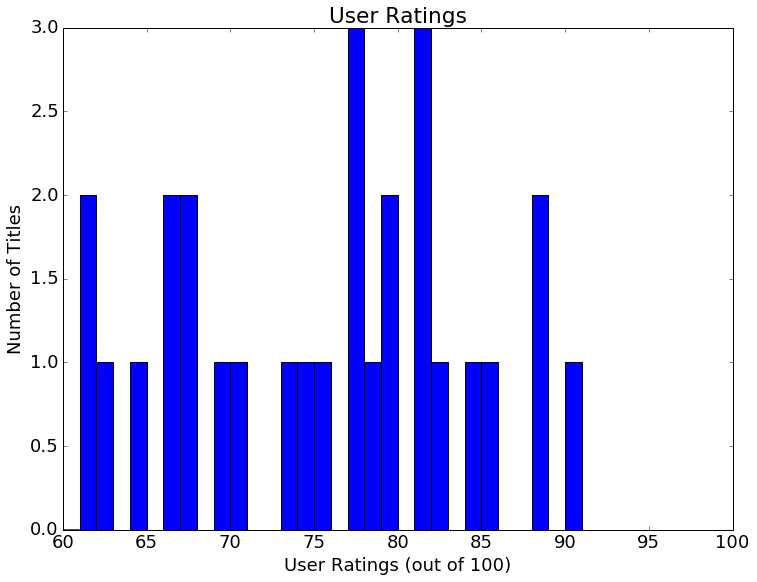

In [49]:
plt.hist(RatingU, bins=np.arange(60,100))
matplotlib.rcParams['figure.figsize'] = (12, 9)
matplotlib.rcParams.update({'font.size': 18})
plt.title('User Ratings')
plt.ylabel('Number of Titles')
plt.xlabel('User Ratings (out of 100)')


plt.show()

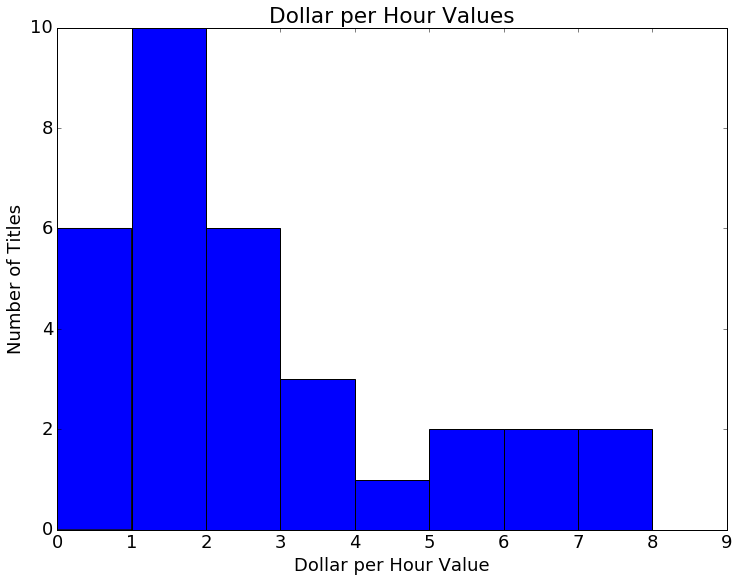

In [50]:
plt.hist(DpH, bins=np.arange(0,10))
matplotlib.rcParams['figure.figsize'] = (12, 9)
matplotlib.rcParams.update({'font.size': 18})
plt.title('Dollar per Hour Values')
plt.ylabel('Number of Titles')
plt.xlabel('Dollar per Hour Value')


plt.show()

Based on the histogram above, we can see that the average Dollar per Hour value of these games tends to be around 1-2 dollars per hour

Just by observing these basic histograms, it's pretty easy to tell that there is no strong correlation between Total sales and DpH. Because the favorable value for DpH is a low value, if they were correlated there should be a lot more games on the higher end of the totals sales spectrum because there are many games with a low DpH value. This same logic holds true for a correlation between Total Sales and User Ratings. The User Ratings for the games are all over the place. If User ratings and Total Sales were strongly correlated, you would expect to see total sales all over the spectrum as well. But Total sales follows an almost geometric distribution.

By comparing the two histograms for Total Sales and Critic Ratings, you can actually see a slight correlation. Critic Ratings peak at around 83 out of 100. There a few outliers on both sides of this peak. There are a few games that obtained scores of 90-95 and a few games that got a score from 63-73. Because there is only a few games that sold more than 7 million copies, it seems as though a high critic score and high total sales may be correlated. To back this up, I did a Spearman's Correlation test.

Conclusion
===

Based on the data that I have acquired, it seems that Total Sales and Dollar per Hour value and Total Sales and User Ratings are not correlated with each other. But Total Sales and Critic Ratings are significantly correlated. It has a slight positive correlation coefficient of .4083. This means that if a game has a high critic rating, then it is likely that the game will have more total sales as well. This could mean that consumers actually do research their games before they buy them, and some of the Total Sales is due to quality and not just hype for the game. This data also shows that the length of the game does not necessarily matter to the consumer (since the total sales is not correlated with DpH).

It's hard to interpret too much from this data because of all the unknowns in this market. For example, it is impossible to know how much game companies spent on marketing because they do not report these numbers. It is also impossible to quantify the effect that marketing has on the consumer market. Without being able to know for sure how much these big factors affect the consumers, it's hard to say whether sales are due to high critic ratings or due to a good marketing team. But we can at least say pretty confidently that the User Rating and Dollar per Hour value for games does not affect total sales because we accepted our null hypothesis

I'd also like to mention a few sources of error in my data. One of the biggest ones is the date range for my game selections. These games have release dates from early 2014 to late 2015. This means that some of the games have been on sale for longer than other games, which would obviously affect the total sales since people have been able to buy it for a longer time. This could skew my results since a game released in late 2015 has not have an equal amount of time to be bought as a game released in early 2014. I was also unable to account for price changes in the games. All of these games released at a starting price of 59.99. But many of them have dropped in price since their release date. A lower price will change the Dollar per Hour value and could possibly affect the sales of the game. But it was impossible to incorporate all of these changes into the data set and it is incredibly difficult to find exactly when each game dropped in price. My last big source of error I'd like to mention is the different genre types. All of these games are triple A titles. I picked triple A titles to try and make sure all of the games had similar market sizes. However, all of these games fit into different niche groups in the gaming industry. For example, The Witcher 3: The Wild Hunt is an open world rpg full of lore and side quests. The Witcher is going to have a much different target audience and market than say a shooter like Call of Duty where most of the focus is on multiplayer. 


Sources
---
http://howlongtobeat.com/ - where I obtained my game length data

http://www.vgchartz.com/ - where I obtained my total sale data

http://www.metacritic.com/ - where I obtained both my Critic Ratings and User Ratings

https://statistics.laerd.com/statistical-guides/spearmans-rank-order-correlation-statistical-guide-2.php - Information on the Spearman's Correlation Test

http://emilkirkegaard.dk/en/?p=4452 - Shapiro-Wilks Test info. W value meaning